# OVERVIEW OF MOTOR VEHICLE CRASHES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import openpyxl
import geopandas
from shapely import wkt
# https://stackoverflow.com/questions/62593913/plotting-a-pie-chart-out-of-a-dictionary
# https://www.google.com/search?client=firefox-b-1-d&q=plot+pie+chart+using+dictionary+python

# df = pd.read_excel("TSF_Table_65_2010.xlsx",engine='openpyxl', header=4, usecols=['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'])
# df.fillna(method='ffill', inplace=True)
# df.columns=['Vehicle Type', 'Person Type', 'Occupants Killed']

In [2]:
df = pd.read_excel('data/figure1.xls')

In [3]:
df.head()

,Year,Total Fatalities,Vehicle Miles Traveled (VMT) Millions,Fatality Rate per 100 Million VMT
0,1899,26,NaN,NaN
1,1900,36,NaN,NaN
2,1901,54,NaN,NaN
3,1902,79,NaN,NaN
4,1903,117,NaN,NaN


In [4]:
df.tail()

,Year,Total Fatalities,Vehicle Miles Traveled (VMT) Millions,Fatality Rate per 100 Million VMT
115,2014,32744,3025656.0,1.082212
116,2015,35484,3095373.0,1.146356
117,2016,37806,3174408.0,1.190962
118,2017,37473,3212347.0,1.166530
119,2018,36560,3240327.0,1.128281


In [5]:
df_sliced = df[df['Year']>=1975]

##### OVERALL TRENDS - Fatalities and Fatality Rate per 100 Million VMT, 1975-2019

([<matplotlib.axis.XTick at 0x24bfe95e4c8>,
 <a list of 23 Text major ticklabel objects>)

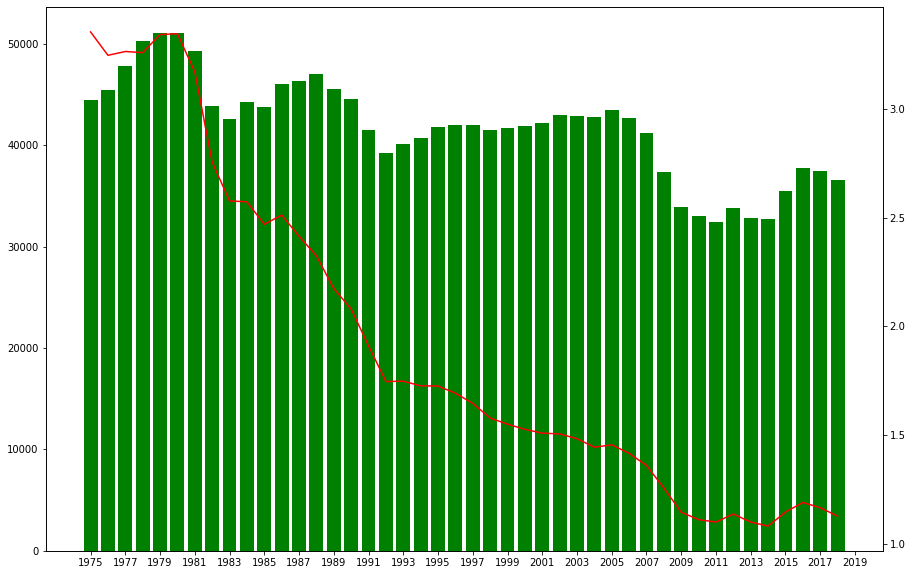

In [6]:
x = []
for i in range(1975, 2020,2):
    x.append(i)
plt.figure(1, figsize=(15,10))
barchart = plt.bar(df_sliced['Year'],df_sliced['Total Fatalities'], color='green')
plt.twinx()
linechart = plt.plot(df_sliced['Year'], df_sliced['Fatality Rate per 100 Million VMT'], color='red')
plt.xticks(x)

In [7]:
injuries = pd.read_excel('data/injuries.xlsx' , header = 4)

In [8]:
injuries.head()

,Year,Injured,Resident Population,"Injury Rate per 100,000 Population",Licensed Drivers,"Injury Rate per 100,000 Licensed Drivers",Registered Motor Vehicles,"Injury Rate per 100,000 Registered Vehicles",Vehicle Miles Traveled (Millions),Injury Rate per 100 Million VMT
0,1988,3427000,244498982,1402,162854000,2105,177455476,1931,2025962,169
1,1989,3292000,246819230,1334,165554000,1989,181164568,1817,2096487,157
2,1990,3246000,249464396,1301,167015000,1944,184275422,1762,2144362,151
3,1991,3107000,252153092,1232,168995000,1839,186370190,1667,2172050,143
4,1992,3079000,255029699,1207,173125000,1779,184937848,1665,2247151,137


In [9]:
injuries.dtypes

Year                                           int64
Injured                                        int64
Resident Population                            int64
Injury Rate per 100,000 Population             int64
Licensed Drivers                               int64
Injury Rate per 100,000 Licensed Drivers       int64
Registered Motor Vehicles                      int64
Injury Rate per 100,000 Registered Vehicles    int64
Vehicle Miles Traveled (Millions)              int64
Injury Rate per 100 Million VMT                int64
dtype: object

In [10]:
injuries["Year"] = pd.to_numeric(injuries["Year"])

#### Overall Trends - People Injured and Injury Rate per 100 Million VMT, 1988-2019

([<matplotlib.axis.XTick at 0x24bfee48e88>,
 <a list of 16 Text major ticklabel objects>)

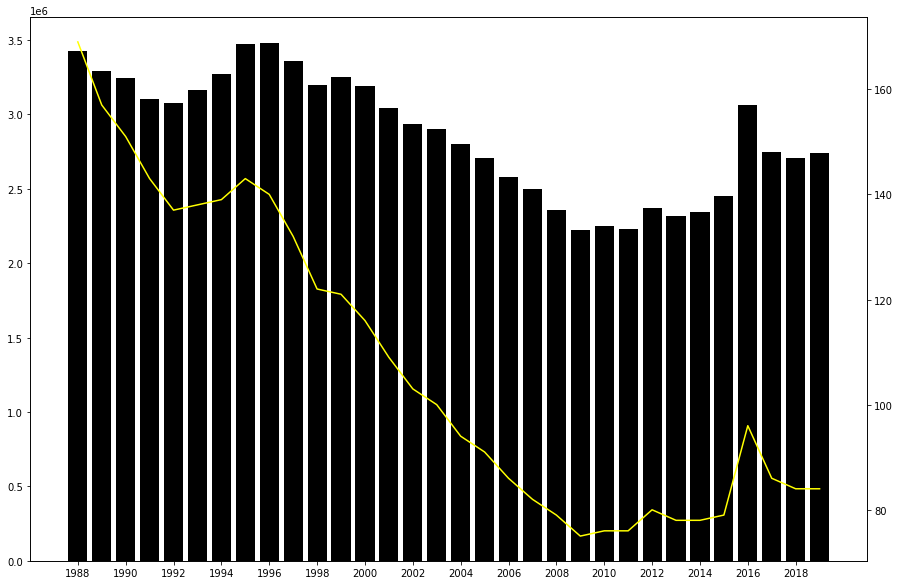

In [11]:
x = []
for i in range(1988, 2020,2):
    x.append(i)
plt.figure(1, figsize=(15,10))
barchart = plt.bar(injuries['Year'], injuries['Injured'], color='black')
plt.twinx()
linechart = plt.plot(injuries['Year'], injuries['Injury Rate per 100 Million VMT'], color='yellow')
plt.xticks(x)

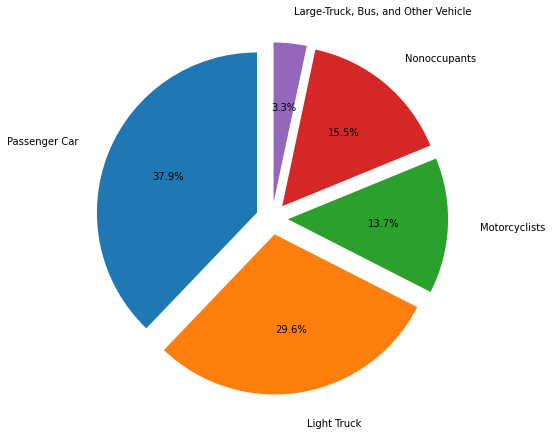

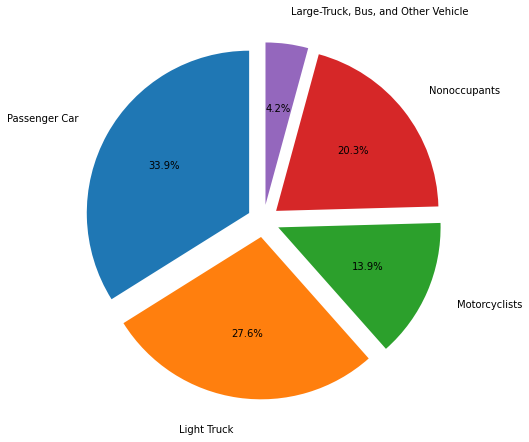

In [12]:
def values(xlfile):
    total_killed = {}
    for index, row in df.iterrows():
        if ((row['Vehicle Type'] != 'Total') and (row['Person Type'] == 'Subtotal')):   
            total_killed[row['Vehicle Type']] = row['Occupants Killed']
        elif ((row['Vehicle Type'] == 'Motorcyclists' or row['Vehicle Type'] == 'Nonoccupants') and (row['Person Type'] == 'Total')):   
            total_killed[row['Vehicle Type']] = row['Occupants Killed']  
        else:
            continue
    return total_killed

def plotpie(dict1):
    labels = []
    number = []
    percent = []
    plt.figure(1, figsize=(7,7))
    for x,y in dict1.items():
        labels.append(x)
        number.append(y)
    # http://www.learningaboutelectronics.com/Articles/How-to-create-a-pie-chart-in-matplotlib-with-Python.php
    plt.pie(number, labels=labels, startangle=90, autopct = '%1.1f%%', 
            explode=(0.1, 0.1, 0.1, 0.1, 0.1), labeldistance=1.2)
    plt.axis('equal')
#    plt.legend(labels, loc = 'upper right' )
    plt.show()
    
xlfile=["data/2010/TSF_Table_65.xlsx", "data/2019/TSF_Table_65.xlsx"]
xlfile1 = ["data/2010/TSF_Table_54.xlsx", "data/2019/TSF_Table_54.xlsx"]

for i in range(len(xlfile)):
    df = pd.read_excel(xlfile[i],engine='openpyxl', header=4, usecols=['Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'])
    df.fillna(method='ffill', inplace=True)
    df.columns=['Vehicle Type', 'Person Type', 'Occupants Killed']
    for j in range(len(xlfile1)):
        if i==j:
            df1 = pd.read_excel(xlfile1[j],engine='openpyxl', header=3, usecols=['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2'])
            df1.fillna(method='ffill', inplace=True)
            df1.columns=['Vehicle Type', 'Person Type', 'Occupants Killed']
            df = pd.concat([df,df1], axis=0)
            total_killed = values(df)
            total_killed['Large-Truck, Bus, and Other Vehicle'] = total_killed['Large Truck']+total_killed['Bus']+ total_killed['Other/Unknown\nVehicle']
            del total_killed['Large Truck'], total_killed['Bus'],total_killed['Other/Unknown\nVehicle']
            plotpie(total_killed)

In [13]:
fig4 = pd.read_excel("data/figure4.xlsx" , header = 4)

In [14]:
fig4.head()

,Injury Severity,Year,Passenger Cars,Light Trucks,Large Trucks,Buses,Other/Unknown,Occupants Total,Motorcycles,Pedestrians,Pedalcyclists,Other/Unknown Nonoccupants,nonoccupants Total,Total
0,Killed,1975,25929,4856,961,53,937,32736,3189,7516,1003,81,8600,44525
1,Killed,1976,26166,5438,1132,73,981,33790,3312,7427,914,80,8421,45523
2,Killed,1977,26782,5976,1287,42,959,35046,4104,7732,922,74,8728,47878
3,Killed,1978,28153,6745,1395,41,622,36956,4577,7795,892,111,8798,50331
4,Killed,1979,27808,7178,1432,39,579,37036,4894,8096,932,135,9163,51093


In [15]:
fig4_killed = fig4.loc[fig4["Injury Severity"] == "Killed"].copy()

In [16]:
fig4_killed["Inside Vehicle"] = fig4_killed["Occupants Total"]/fig4_killed["Total"]*100
# fig4_killed["Outside Vehicle"] = fig4_killed["nonoccupants Total"]/fig4_killed["Total"]*100
fig4_killed["Outside Vehicle"] = 100 - fig4_killed["Inside Vehicle"]

In [17]:
fig4_sliced = fig4_killed[["Year", "Occupants Total", "nonoccupants Total", "Total", "Inside Vehicle", "Outside Vehicle"]]

In [18]:
fig4_sliced.head()

,Year,Occupants Total,nonoccupants Total,Total,Inside Vehicle,Outside Vehicle
0,1975,32736,8600,44525,73.522740,26.477260
1,1976,33790,8421,45523,74.226215,25.773785
2,1977,35046,8728,47878,73.198546,26.801454
3,1978,36956,8798,50331,73.425920,26.574080
4,1979,37036,9163,51093,72.487425,27.512575


#### Overall Trends - Proportion of Fatalities Inside/Outside Vehicle, 1975-2019

([<matplotlib.axis.YTick at 0x24bfef2ecc8>,
 <a list of 10 Text major ticklabel objects>)

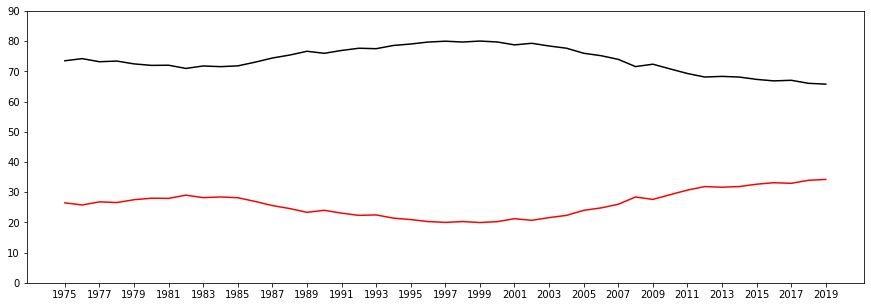

In [19]:
x = []
y = []
for i in range(0,100,10):
    y.append(i)
for i in range(1975, 2020,2):
    x.append(i)
plt.figure(1, figsize=(15,5))
linechart1 = plt.plot(fig4_sliced['Year'], fig4_sliced['Inside Vehicle'], color='black')
# plt.twinx()
linechart2 = plt.plot(fig4_sliced['Year'], fig4_sliced['Outside Vehicle'], color='red')
plt.xticks(x)
plt.yticks(y)

In [20]:
fig5 = pd.read_excel("data/figure5.xlsx")

In [21]:
fig5.head()

,Year,Urban Deaths,UD_Perct,Rural Deaths,RD_Perct,Total Deaths
0,1977,19296,40,28463,60,47878
1,1978,19863,40,30018,60,50331
2,1979,21507,42,29135,58,51093
3,1980,21560,43,29114,57,51091
4,1981,20782,43,27692,57,49301


#### Fatalities by Land Use, 2010-2019

([<matplotlib.axis.XTick at 0x24bff3c1488>,
 <a list of 23 Text major ticklabel objects>)

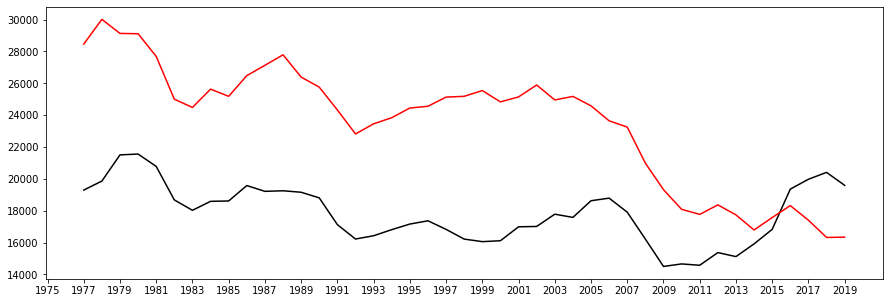

In [22]:
fig6 = fig5[fig5['Year']>=2010].copy()
plt.figure(1, figsize=(15,5))
linechart1 = plt.plot(fig5['Year'], fig5['Urban Deaths'], color='black')
# plt.twinx()
linechart2 = plt.plot(fig5['Year'], fig5['Rural Deaths'], color='red')
plt.xticks(x)
# plt.yticks(y)

#### 2019 Traffic Fatalities and Percentage Changes From 2018, by State

In [23]:
dataframes_dict = {}
for i in range(2010, 2020):
    file = 'data/'+ str(i) + "/CRASH.csv"
    file1 = pd.read_csv(file)
    file1 = file1.drop([0,1,2,3,59,58,57,56,55])
    file1 = file1.rename(columns = {"Table 106": "States", "Unnamed: 1": "fatalities{}" .format(i-1) , 
                            "Unnamed: 2": "fatalities{}".format(i) ,
                        "Unnamed: 3": "% Change"})
    dataframes_dict[i] = file1
print(dataframes_dict[2019].head())

       States fatalities2018 fatalities2019 % Change
4     Alabama            953            930       -2
5      Alaska             80             67      -16
6     Arizona          1,011            981       -3
7    Arkansas            520            505       -3
8  California          3,798          3,606       -5


In [24]:
year = int(input("Enter the year:\n"))

Enter the year:
2015


In [25]:
df2 = dataframes_dict[year]
df2.rename(columns = {'States': 'NAME'}, inplace =  True)
df2.head()

,NAME,fatalities2014,fatalities2015,% Change
4,Alabama,820,850,4
5,Alaska,73,65,-11
6,Arizona,773,897,16
7,Arkansas,470,550,17
8,California,"3,102","3,387",9


In [26]:
states_shp = geopandas.read_file('data/geopandas/usa-states-census-2014.shp')
states_shp.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,..."
1,11,01702382,0400000US11,11,DC,District of Columbia,00,158350578,18633500,Northeast,"POLYGON Z ((-77.11976 38.93434 0.00000, -77.04..."
2,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ..."
3,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117...."


In [27]:
states_shp = states_shp.merge(df2, on = "NAME")
states_shp.head()
states_shp['fatalities{}'.format(year)] = states_shp['fatalities{}'.format(year)].str.replace(',', '').astype(int)
states_shp.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,region,geometry,fatalities2014,fatalities2015,% Change
0,06,01779778,0400000US06,06,CA,California,00,403483823181,20483271881,West,"MULTIPOLYGON Z (((-118.59397 33.46720 0.00000,...","3,102",3387,9
1,12,00294478,0400000US12,12,FL,Florida,00,138903200855,31407883551,Southeast,"MULTIPOLYGON Z (((-81.81169 24.56874 0.00000, ...","2,494",2938,18
2,13,01705317,0400000US13,13,GA,Georgia,00,148963503399,4947080103,Southeast,"POLYGON Z ((-85.60516 34.98468 0.00000, -85.47...","1,164",1432,23
3,16,01779783,0400000US16,16,ID,Idaho,00,214045425549,2397728105,West,"POLYGON Z ((-117.24303 44.39097 0.00000, -117....",186,216,16
4,17,01779784,0400000US17,17,IL,Illinois,00,143794747023,6200927458,Midwest,"POLYGON Z ((-91.50617 40.20064 0.00000, -91.49...",924,998,8


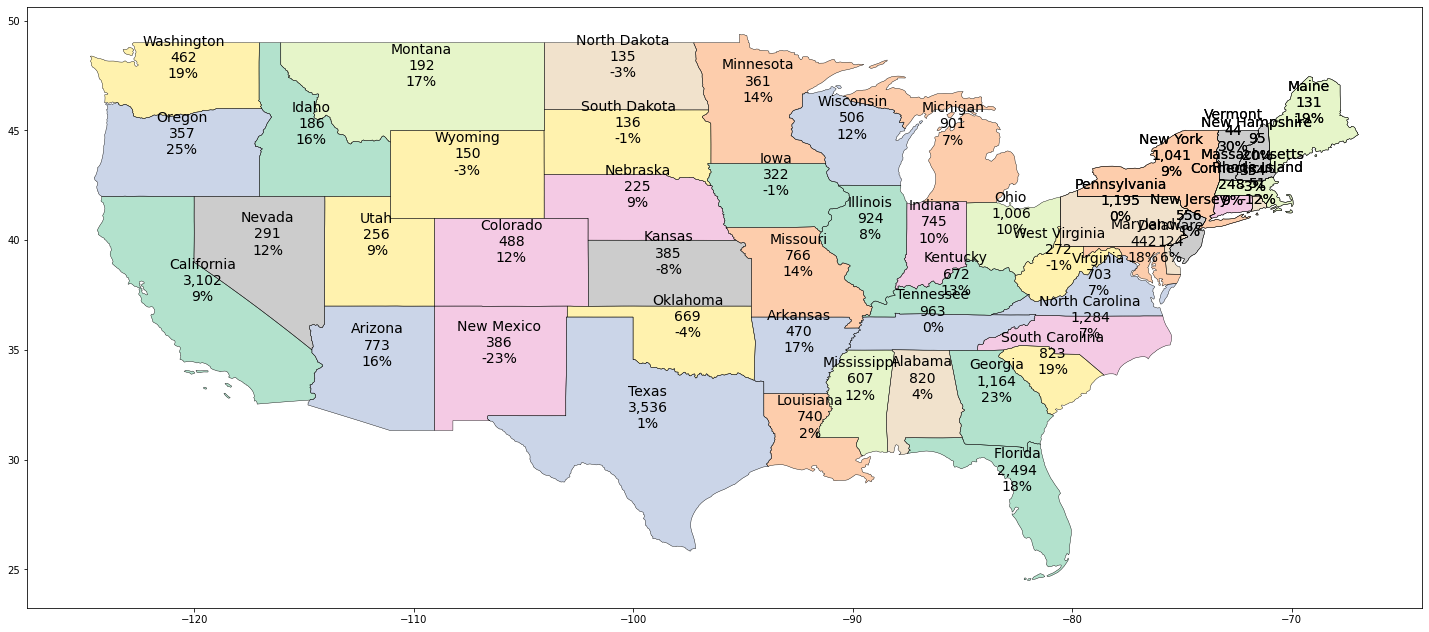

In [28]:
import math
fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
states_shp.apply(lambda x: ax.annotate(
    s=x.NAME + "\n" + str(x["fatalities{}".format(year-1)]) + "\n" + str(x["% Change"]) + "%", 
    xy=x.geometry.centroid.coords[0],
    ha='center', 
    fontsize=14
),axis=1);
states_shp.boundary.plot(ax=ax, color='Black', linewidth=.4)
states_shp.plot(ax=ax, cmap='Pastel2', figsize=(12, 12))

(-127.6146362, -64.06109779999998, 23.253819649999997, 50.62866934999999)

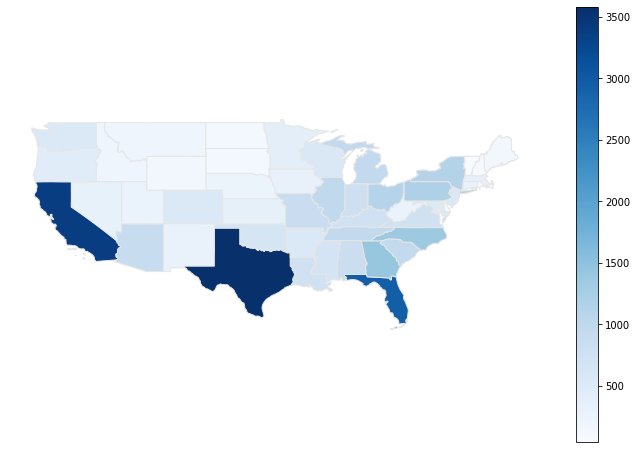

In [29]:
fig, ax = plt.subplots(1, figsize=(12,8))
states_shp.plot(column='fatalities{}'.format(year), cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', legend = True)
ax.axis('off')

In [30]:
restraint_use = pd.read_excel("data/restrain_type.xlsx", header = 4)

In [31]:
restraint_use.head()

,Crash Severity,Year,Restrained Number,Restrained Percent,Unrestrained Number,Unrestrained Percent,Unknown Number,Unknown Percent,Total Number,Percent
0,Fatal,1975,2580,5.6,29713,64.3,13931,30.1,46224,100
1,Fatal,1976,2059,4.5,29908,64.7,14239,30.8,46206,100
2,Fatal,1977,1895,3.9,33013,67.3,14154,28.8,49062,100
3,Fatal,1978,1878,3.6,37610,72.3,12510,24.1,51998,100
4,Fatal,1979,1680,3.2,38326,73.5,12123,23.3,52129,100


In [32]:
ru_fatal = restraint_use[restraint_use["Crash Severity"] == "Fatal"].copy()

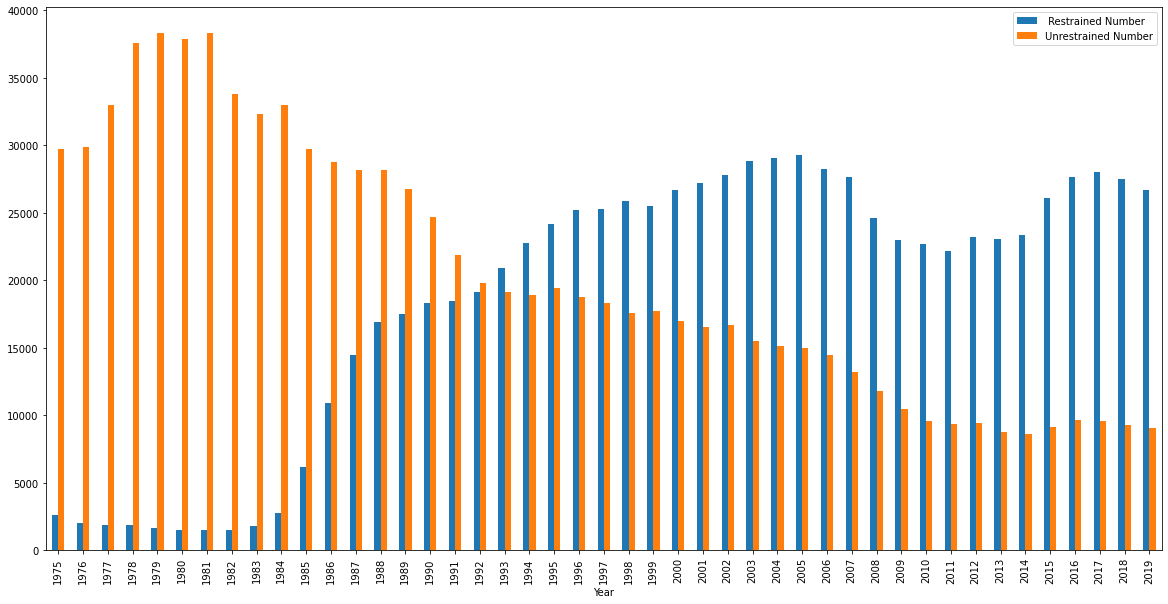

In [33]:
x = []
for i in range(1975, 2020,1):
    x.append(i)
X_axis = np.arange(len(ru_fatal))  
# plt.bar(X_axis - 0.2, ru_fatal["Restrained Number"], 0.4, label = 'Restrained')
# plt.bar(X_axis + 0.2, ru_fatal["Unrestrained Number"], 0.4, label = 'Unrestrained')
  
# plt.xticks(X_axis, x)
# plt.xlabel("Groups")
# plt.ylabel("Number of Students")
# plt.title("Number of Students in each group")
# plt.legend()
# plt.show()
# plt.figure(2, figsize=(10,10))
plt.rcParams['figure.figsize'] = [20, 10]
ru_fatal.plot(x="Year", y=[" Restrained Number", "Unrestrained Number"], kind="bar")
plt.show()
# plt.figure(1, figsize=(20,10))
# plt.xticks(x)